<div class="alert alert-block alert-info">
    <h1>Análisis de Series Temporales</h1>
    <h3>Clase 8</h3>
    <h3>Ejercicio 2</h3>
        <p>Docente: Rodrigo Del Rosso<p>
        <p>Asistentes: Sebastián Calcagno y Braian Drago<p>
</div>

*Ejercicio Time-GPT*

_IA generativa para series temporales_

Ya sea que sea un banco que pronostica las tendencias del mercado o una startup que predice la demanda de productos, TimeGPT democratiza el acceso a conocimientos predictivos de vanguardia, eliminando la necesidad de un equipo dedicado de ingenieros de aprendizaje automático.


# Configuraciones iniciales

In [ ]:
!pip install nixtla

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 2.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from nixtla import NixtlaClient
from datetime import datetime

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
nixtla_client = NixtlaClient(
    # defaults to os.environ.get("NIXTLA_API_KEY")
    api_key = 'nixak-h8iV80neQevJ6Zea6Vvw5QtyhIK6ADThKjuvDgp8jVZJiqlnO8C9PyKydKrMxRokzGynSddzUG30T4rc'
)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd


ruta_csv = '/content/drive/My Drive/Colab Notebooks/analisis_de_series_temporales/Clase8/DISTANCIA 2024/datasetmeses01_03_2023.csv'
df = pd.read_csv(ruta_csv, encoding='latin1')

df_backup = df.copy()

df.head()

Mounted at /content/drive


,MesMesAño,Hora HH,Cat Cobrada,ID Peaje,Observacion,Sentido,Tipo Cobro,Pasos,Unnamed: 8,Unnamed: 9
0,1/1/2023,12:00:00 AM,Auto,ALB,Mercado Pago,Centro,Mercado Pago,1.0,NaN,NaN
1,1/1/2023,12:00:00 AM,Auto,ALB,Mercado Pago,Provincia,Mercado Pago,10.0,NaN,NaN
2,1/1/2023,12:00:00 AM,Auto,ALB,Mercado Pago OCR,Centro,Mercado Pago,3.0,NaN,NaN
3,1/1/2023,12:00:00 AM,Auto,ALB,Mercado Pago OCR,Provincia,Mercado Pago,3.0,NaN,NaN
4,1/1/2023,12:00:00 AM,Auto,ALB,Tag - PosPago,Centro,Tag,4.0,NaN,NaN


In [ ]:
# formato Datetime
df_backup['fecha'] = pd.to_datetime(df_backup['MesMesAño'], format='%d/%m/%Y')
df_backup['hora'] = pd.to_datetime(df_backup['Hora HH'], format='%I:%M:%S %p').dt.time
#mezcla
df_backup['fecha_hora'] = df_backup.apply(lambda row: datetime.combine(row['fecha'], row['hora']), axis=1)

df_backup = df_backup.drop(columns=['Unnamed: 8', 'Unnamed: 9'])

In [ ]:
df_backup.dtypes

,0
MesMesAño,object
Hora HH,object
Cat Cobrada,object
ID Peaje,object
Observacion,object
Sentido,object
Tipo Cobro,object
Pasos,float64
fecha,datetime64[ns]
hora,object


In [ ]:
# Elimino columnas que estan de mas
df = df.drop(columns=['Unnamed: 8', 'Unnamed: 9'])

In [ ]:
'''
from google.colab import files
uploaded = files.upload()

import pandas as pd

# Reemplaza 'datos.csv' por el nombre exacto de tu archivo
df = pd.read_csv('datasetmeses01_03_2023.csv', encoding='ISO-8859-1')
'''

"\nfrom google.colab import files\nuploaded = files.upload()\n\nimport pandas as pd\n\n# Reemplaza 'datos.csv' por el nombre exacto de tu archivo\ndf = pd.read_csv('datasetmeses01_03_2023.csv', encoding='ISO-8859-1')\n"

In [ ]:
df.tail()

,MesMesAño,Hora HH,Cat Cobrada,ID Peaje,Observacion,Sentido,Tipo Cobro,Pasos
798049,31/3/2023,11:00:00 PM,Pesados 6 Ejes,PB1,Violación - Normal,Provincia,Violación,1.0
798050,31/3/2023,11:00:00 PM,Pesados 6 Ejes,PB2,Tag - PosPago,Centro,Tag,2.0
798051,31/3/2023,11:00:00 PM,Pesados 6 Ejes,PB2,Tag - PosPago OCR,Centro,Tag,3.0
798052,31/3/2023,11:00:00 PM,Pesados 6 Ejes,PB4,Tag - PosPago,Centro,Tag,13.0
798053,31/3/2023,11:00:00 PM,Pesados 6 Ejes,PB4,Tag - PosPago OCR,Centro,Tag,4.0


In [ ]:
# Filtrar por la inicial ALB en la columna "ID Peaje"
df_filtrado = df[df["ID Peaje"] == 'ALB']

In [ ]:
# Filtrar sentido al centro
df_filtrado = df[df["Sentido"] == 'Centro']

In [ ]:
df_filtrado.dtypes

,0
MesMesAño,object
Hora HH,object
Cat Cobrada,object
ID Peaje,object
Observacion,object
Sentido,object
Tipo Cobro,object
Pasos,float64


In [ ]:
'''
Aqui opera las columnas de fecha para que queden en el formato correcto

'''

df_filtrado['fecha'] = pd.to_datetime(df_filtrado['MesMesAño'], format='%d/%m/%Y')
df_filtrado['hora'] = pd.to_datetime(df_filtrado['Hora HH'], format='%I:%M:%S %p').dt.time
#mezcla
df_filtrado['fecha_hora'] = df_filtrado.apply(lambda row: datetime.combine(row['fecha'], row['hora']), axis=1)

<ipython-input-12-33b48b8fdcdc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['fecha'] = pd.to_datetime(df_filtrado['MesMesAño'], format='%d/%m/%Y')
<ipython-input-12-33b48b8fdcdc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['hora'] = pd.to_datetime(df_filtrado['Hora HH'], format='%I:%M:%S %p').dt.time
<ipython-input-12-33b48b8fdcdc>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [ ]:
df_filtrado.tail(5)

,MesMesAño,Hora HH,Cat Cobrada,ID Peaje,Observacion,Sentido,Tipo Cobro,Pasos,fecha,hora,fecha_hora
798045,31/3/2023,11:00:00 PM,Pesados 6 Ejes,ILP,Tag - PosPago OCR,Centro,Tag,4.0,2023-03-31,23:00:00,2023-03-31 23:00:00
798050,31/3/2023,11:00:00 PM,Pesados 6 Ejes,PB2,Tag - PosPago,Centro,Tag,2.0,2023-03-31,23:00:00,2023-03-31 23:00:00
798051,31/3/2023,11:00:00 PM,Pesados 6 Ejes,PB2,Tag - PosPago OCR,Centro,Tag,3.0,2023-03-31,23:00:00,2023-03-31 23:00:00
798052,31/3/2023,11:00:00 PM,Pesados 6 Ejes,PB4,Tag - PosPago,Centro,Tag,13.0,2023-03-31,23:00:00,2023-03-31 23:00:00
798053,31/3/2023,11:00:00 PM,Pesados 6 Ejes,PB4,Tag - PosPago OCR,Centro,Tag,4.0,2023-03-31,23:00:00,2023-03-31 23:00:00


In [ ]:

df_filtrado['solo_fecha'] = df_filtrado['fecha_hora']

df_agrupado = df_filtrado.groupby('solo_fecha')['Pasos'].sum().reset_index()


df_agrupado.rename(columns={'Pasos': 'total_pasos'}, inplace=True)

print(df_agrupado.head())

           solo_fecha  total_pasos
0 2023-01-01 00:00:00    25297.287
1 2023-01-01 01:00:00     1660.000
2 2023-01-01 02:00:00     1302.000
3 2023-01-01 03:00:00     1466.000
4 2023-01-01 04:00:00     2758.000


<ipython-input-14-41ceb87de842>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['solo_fecha'] = df_filtrado['fecha_hora']


In [ ]:
'''
NO CORRER

# Convierte la columna fecha_hora a formato de string para verificar que incluya la hora
df_agrupado['solo_fecha'] = df_agrupado['solo_fecha'].apply(lambda x: x.strftime('%Y-%m-%d %I:%M:%S %p'))

# Verifica el resultado imprimiendo algunas filas
print(df_agrupado[['solo_fecha']].head())

'''

"\nNO CORRER\n\n# Convierte la columna fecha_hora a formato de string para verificar que incluya la hora\ndf_agrupado['solo_fecha'] = df_agrupado['solo_fecha'].apply(lambda x: x.strftime('%Y-%m-%d %I:%M:%S %p'))\n\n# Verifica el resultado imprimiendo algunas filas\nprint(df_agrupado[['solo_fecha']].head())\n\n"

In [ ]:
df_agrupado.head(5)

,solo_fecha,total_pasos
0,2023-01-01 00:00:00,25297.287
1,2023-01-01 01:00:00,1660.000
2,2023-01-01 02:00:00,1302.000
3,2023-01-01 03:00:00,1466.000
4,2023-01-01 04:00:00,2758.000


# Detección de anomalías y trabajo para completar los campos sin dato

La detección de anomalías implica hacer predicciones y generar un intervalo de confianza del 99%. Si un punto observado queda fuera de ese intervalo, se trata de una anomalía.*texto en cursiva*

https://docs.nixtla.io/docs/tutorials-missing_values

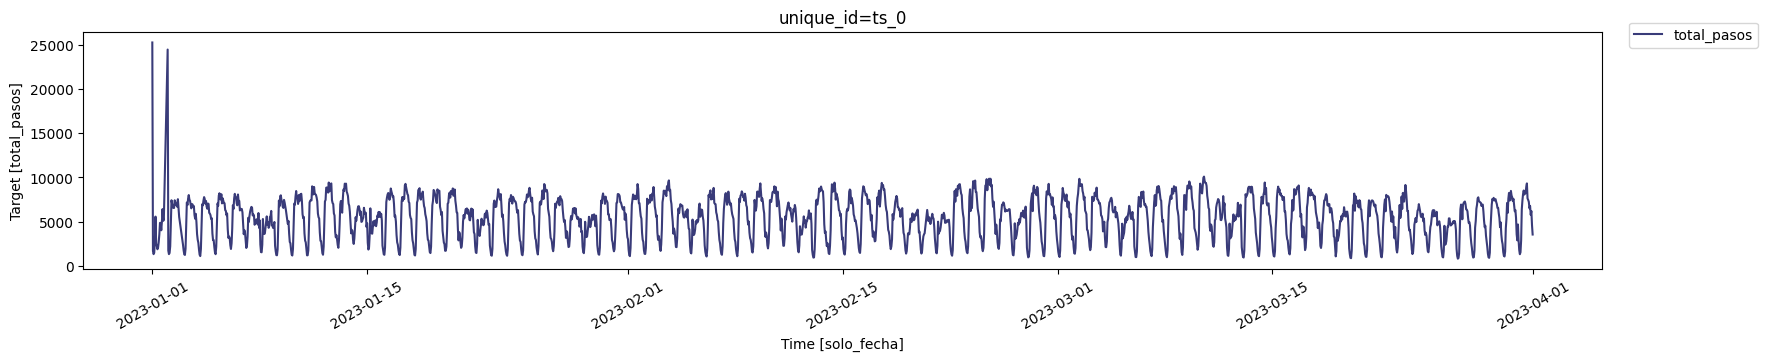

In [ ]:
nixtla_client.plot(df_agrupado,
                   time_col='solo_fecha',
                   target_col='total_pasos',
                   max_insample_length= 3000
                   )

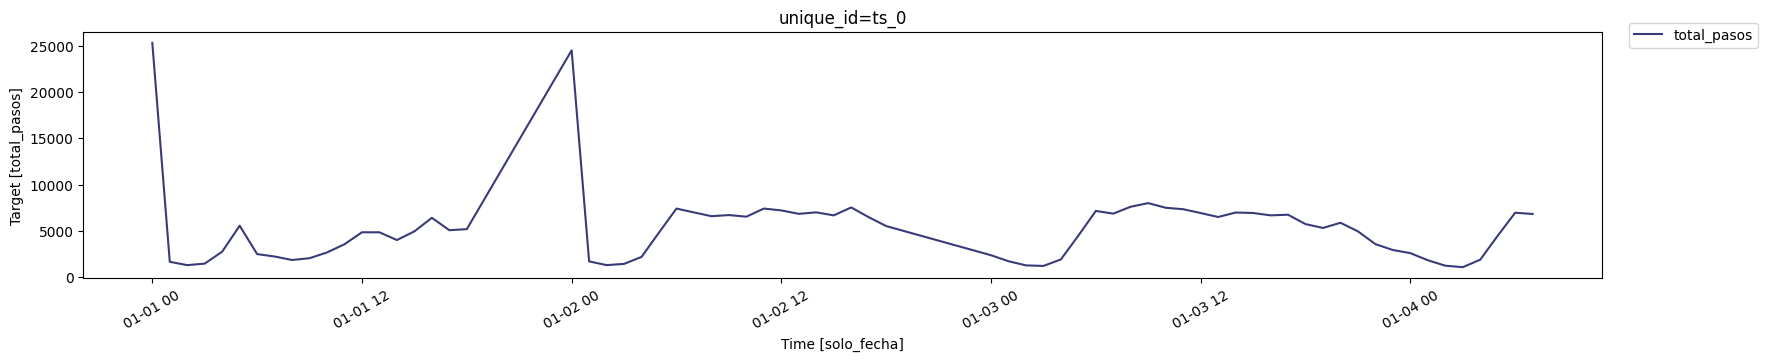

In [ ]:
# Filtrar las primeras 70 filas
df_primero_70 = df_agrupado.head(70)


nixtla_client.plot(df_primero_70,
                   time_col='solo_fecha',
                   target_col='total_pasos',
                   engine='matplotlib')


In [ ]:
# Ver las primeras 20 filas
print(df_primero_70.head(40))

# Ver las últimas 20 filas
print(df_primero_70.tail(20))

            solo_fecha  total_pasos
0  2023-01-01 00:00:00    25297.287
1  2023-01-01 01:00:00     1660.000
2  2023-01-01 02:00:00     1302.000
3  2023-01-01 03:00:00     1466.000
4  2023-01-01 04:00:00     2758.000
5  2023-01-01 05:00:00     5557.000
6  2023-01-01 06:00:00     2494.000
7  2023-01-01 07:00:00     2233.000
8  2023-01-01 08:00:00     1856.000
9  2023-01-01 09:00:00     2050.000
10 2023-01-01 10:00:00     2673.000
11 2023-01-01 11:00:00     3559.000
12 2023-01-01 12:00:00     4850.000
13 2023-01-01 13:00:00     4845.000
14 2023-01-01 14:00:00     4010.000
15 2023-01-01 15:00:00     4951.000
16 2023-01-01 16:00:00     6410.000
17 2023-01-01 17:00:00     5073.344
18 2023-01-01 18:00:00     5188.703
19 2023-01-02 00:00:00    24494.012
20 2023-01-02 01:00:00     1706.000
21 2023-01-02 02:00:00     1304.000
22 2023-01-02 03:00:00     1435.000
23 2023-01-02 04:00:00     2190.000
24 2023-01-02 05:00:00     4823.000
25 2023-01-02 06:00:00     7409.869
26 2023-01-02 07:00:00     6

In [ ]:
df_agrupado.rename(columns={'solo_fecha': 'ds', 'total_pasos': 'y'}, inplace=True)
df_agrupado.head()

,ds,y
0,2023-01-01 00:00:00,25297.287
1,2023-01-01 01:00:00,1660.000
2,2023-01-01 02:00:00,1302.000
3,2023-01-01 03:00:00,1466.000
4,2023-01-01 04:00:00,2758.000


In [ ]:
df_agrupado_2=df_agrupado.copy()

In [ ]:
df_agrupado['unique_id'] = 'id1'
df_agrupado = df_agrupado[['unique_id', 'ds', 'y']]

In [ ]:
from utilsforecast.preprocessing import fill_gaps


In [ ]:
print('Number of rows before filling gaps:', len(df_agrupado))
df_agrupado_complete = fill_gaps(df_agrupado, freq='H')
print('Number of rows after filling gaps:', len(df_agrupado_complete))

Number of rows before filling gaps: 2150
Number of rows after filling gaps: 2160


/usr/local/lib/python3.10/dist-packages/utilsforecast/preprocessing.py:131: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset = pd.tseries.frequencies.to_offset(freq)


In [ ]:
# Filtrar las primeras 70 filas
df_agrupado_complete_primero_70 = df_agrupado_complete.head(70)

print(df_agrupado_complete_primero_70.head(40))


print(df_agrupado_complete_primero_70.tail(20))

   unique_id                  ds          y
0        id1 2023-01-01 00:00:00  25297.287
1        id1 2023-01-01 01:00:00   1660.000
2        id1 2023-01-01 02:00:00   1302.000
3        id1 2023-01-01 03:00:00   1466.000
4        id1 2023-01-01 04:00:00   2758.000
5        id1 2023-01-01 05:00:00   5557.000
6        id1 2023-01-01 06:00:00   2494.000
7        id1 2023-01-01 07:00:00   2233.000
8        id1 2023-01-01 08:00:00   1856.000
9        id1 2023-01-01 09:00:00   2050.000
10       id1 2023-01-01 10:00:00   2673.000
11       id1 2023-01-01 11:00:00   3559.000
12       id1 2023-01-01 12:00:00   4850.000
13       id1 2023-01-01 13:00:00   4845.000
14       id1 2023-01-01 14:00:00   4010.000
15       id1 2023-01-01 15:00:00   4951.000
16       id1 2023-01-01 16:00:00   6410.000
17       id1 2023-01-01 17:00:00   5073.344
18       id1 2023-01-01 18:00:00   5188.703
19       id1 2023-01-01 19:00:00        NaN
20       id1 2023-01-01 20:00:00        NaN
21       id1 2023-01-01 21:00:00

In [ ]:
# Ver los NaN
campos_nan = df_agrupado_complete[df_agrupado_complete['y'].isna()]
print(campos_nan)

   unique_id                  ds   y
19       id1 2023-01-01 19:00:00 NaN
20       id1 2023-01-01 20:00:00 NaN
21       id1 2023-01-01 21:00:00 NaN
22       id1 2023-01-01 22:00:00 NaN
23       id1 2023-01-01 23:00:00 NaN
43       id1 2023-01-02 19:00:00 NaN
44       id1 2023-01-02 20:00:00 NaN
45       id1 2023-01-02 21:00:00 NaN
46       id1 2023-01-02 22:00:00 NaN
47       id1 2023-01-02 23:00:00 NaN


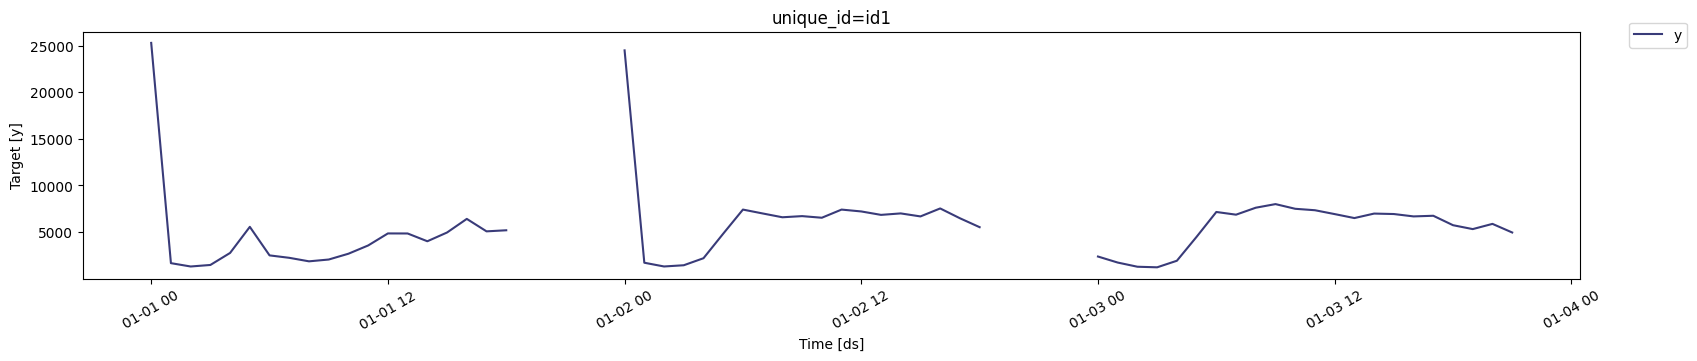

In [ ]:
# Filtrar las primeras 70 filas

nixtla_client.plot(df_agrupado_complete_primero_70,
                   time_col='ds',
                   target_col='y',
                   engine='matplotlib')

In [ ]:
# Llenamos con la mediana de la columna y
df_agrupado_complete['y'].fillna(df_agrupado_complete['y'].median(), inplace=True)

<ipython-input-27-bfdb0cb3ccaf>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_agrupado_complete['y'].fillna(df_agrupado_complete['y'].median(), inplace=True)


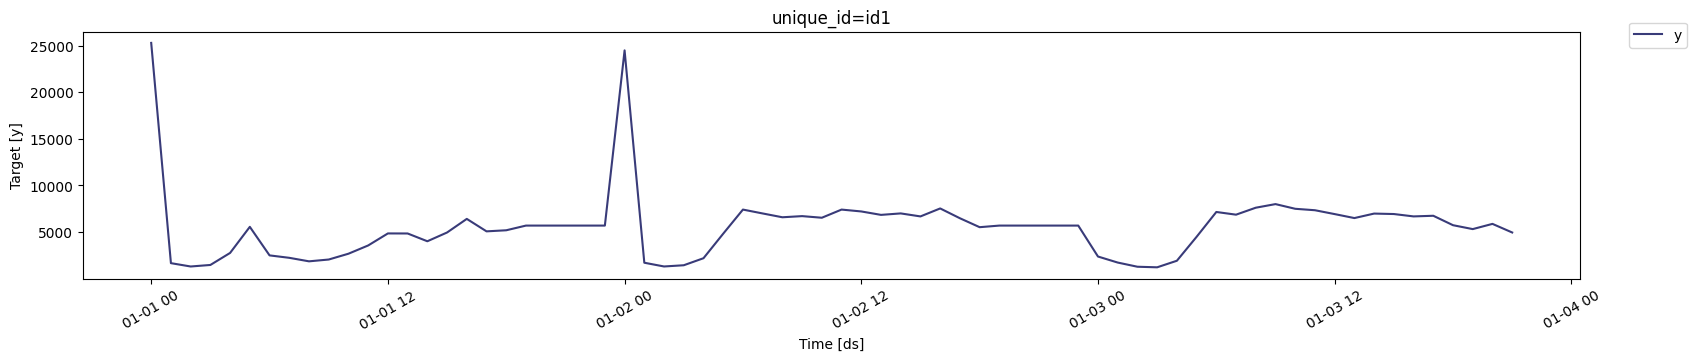

In [ ]:
# Filtrar las primeras 70 filas
df_agrupado_complete_primero_70_2 = df_agrupado_complete.head(70)

# Filtrar las primeras 70 filas

nixtla_client.plot(df_agrupado_complete_primero_70_2,
                   time_col='ds',
                   target_col='y',
                   engine='matplotlib')

In [ ]:
# help(nixtla_client.detect_anomalies)

https://docs.nixtla.io/docs/capabilities-anomaly-detection-anomaly_detection

La detección de anomalías implica hacer predicciones y generar un intervalo de confianza del 99% ( por ejemplo ). Si un punto observado queda fuera de ese intervalo, se trata de una anomalía.

/usr/local/lib/python3.10/dist-packages/utilsforecast/preprocessing.py:131: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset = pd.tseries.frequencies.to_offset(freq)


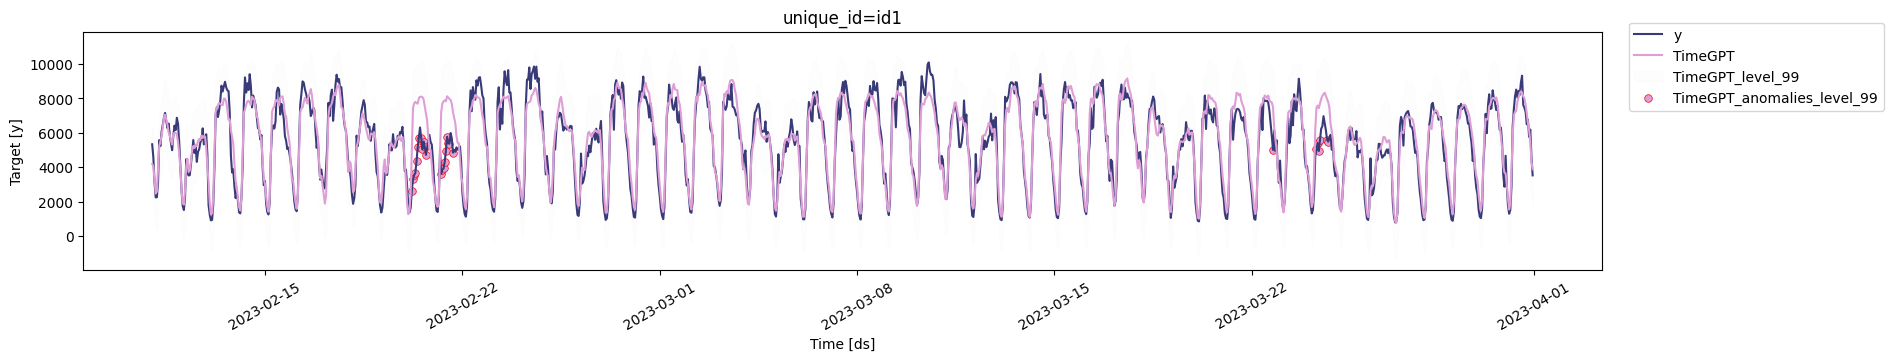

In [ ]:
# Deteccion de anomalias
anomalies_df = nixtla_client.detect_anomalies(
    df_agrupado_complete,
    time_col='ds',
    target_col='y',
    freq='H',
    clean_ex_first = False,
    model='timegpt-1-long-horizon',
    level=99
)

# Plotear anomalias
nixtla_client.plot(
    df_agrupado_complete,
    anomalies_df,
    time_col='ds',
    target_col='y'
)

In [ ]:
anomalies_df

,unique_id,ds,y,TimeGPT,TimeGPT-hi-99,TimeGPT-lo-99,anomaly
0,id1,2023-02-11 00:00:00,5335.000,4192.5830,6282.1787,2102.98730,False
1,id1,2023-02-11 01:00:00,4570.000,4046.2383,6135.8340,1956.64270,False
2,id1,2023-02-11 02:00:00,3117.000,3270.9850,5360.5806,1181.38950,False
3,id1,2023-02-11 03:00:00,2246.000,2472.4970,4562.0930,382.90146,False
4,id1,2023-02-11 04:00:00,2254.000,2589.9453,4679.5410,500.34970,False
...,...,...,...,...,...,...,...
1171,id1,2023-03-31 19:00:00,6762.081,6574.9897,8664.5850,4485.39400,False
1172,id1,2023-03-31 20:00:00,5759.058,6152.1636,8241.7590,4062.56790,False
1173,id1,2023-03-31 21:00:00,6188.424,5484.7530,7574.3486,3395.15720,False
1174,id1,2023-03-31 22:00:00,4582.000,4305.2256,6394.8213,2215.63000,False


# Proyeccion simple

In [ ]:
print('Number of rows before filling gaps:', len(df_agrupado))
df_agrupado_proyeccion_simple = fill_gaps(df_agrupado, freq='H')
print('Number of rows after filling gaps:', len(df_agrupado_proyeccion_simple))

Number of rows before filling gaps: 2150
Number of rows after filling gaps: 2160


/usr/local/lib/python3.10/dist-packages/utilsforecast/preprocessing.py:131: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset = pd.tseries.frequencies.to_offset(freq)


In [ ]:
missing_values = df_agrupado_proyeccion_simple.isnull().sum()
print(missing_values)

unique_id     0
ds            0
y            10
dtype: int64


In [ ]:
rows_with_missing = df_agrupado_proyeccion_simple[df_agrupado_proyeccion_simple.isnull().any(axis=1)]
print(rows_with_missing)

   unique_id                  ds   y
19       id1 2023-01-01 19:00:00 NaN
20       id1 2023-01-01 20:00:00 NaN
21       id1 2023-01-01 21:00:00 NaN
22       id1 2023-01-01 22:00:00 NaN
23       id1 2023-01-01 23:00:00 NaN
43       id1 2023-01-02 19:00:00 NaN
44       id1 2023-01-02 20:00:00 NaN
45       id1 2023-01-02 21:00:00 NaN
46       id1 2023-01-02 22:00:00 NaN
47       id1 2023-01-02 23:00:00 NaN


In [ ]:
df_agrupado_proyeccion_simple = df_agrupado_proyeccion_simple.iloc[48:].reset_index(drop=True)

In [ ]:
rows_with_missing = df_agrupado_proyeccion_simple[df_agrupado_proyeccion_simple.isnull().any(axis=1)]
print(rows_with_missing)

Empty DataFrame
Columns: [unique_id, ds, y]
Index: []


In [ ]:
df_agrupado_proyeccion_simple.head(5)

,unique_id,ds,y
0,id1,2023-01-03 00:00:00,2372.0
1,id1,2023-01-03 01:00:00,1725.0
2,id1,2023-01-03 02:00:00,1276.0
3,id1,2023-01-03 03:00:00,1214.0
4,id1,2023-01-03 04:00:00,1918.0


/usr/local/lib/python3.10/dist-packages/utilsforecast/preprocessing.py:131: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset = pd.tseries.frequencies.to_offset(freq)
/usr/local/lib/python3.10/dist-packages/utilsforecast/processing.py:384: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/usr/local/lib/python3.10/dist-packages/utilsforecast/processing.py:440: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)


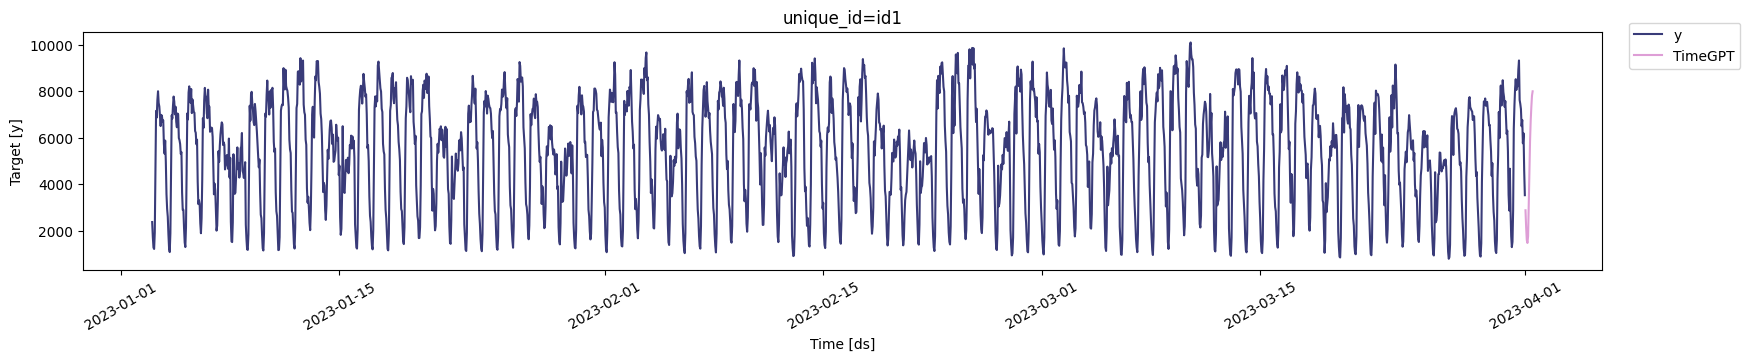

In [ ]:
# Forecast
forecast_df = nixtla_client.forecast(
    df=df_agrupado_proyeccion_simple,
    h=12,
    time_col='ds',
    target_col="y",
    freq='H'

)

# Plot predictions
nixtla_client.plot(
    df=df_agrupado_proyeccion_simple,
    forecasts_df=forecast_df,
    time_col='ds',
    target_col='y'
)


# Agregar variables exógenas a la proyeccion


Para modelar con características exógenas, tienes dos opciones:

1. Usar variables exogenas historicas: Incluye estas variables en el dataFrame que pasas al metodo de pronostico. Esto significa que las variables que ya has observado en el pasado se utilizan como informacion adicional para mejorar el modelo de pronostico.

2. Usar variables exogenas futuras: Incluye estas variables en el dataFrame que pasas al metodo de pronostico y proporciona los valores futuros de estas caracteristicas exogenas a lo largo del horizonte de pronóstico utilizando el parametro `X_df`. Esto implica que debes tener los valores previstos de estas variables para el periodo que estás tratando de predecir, lo cual puede ayudar a obtener pronósticos más precisos.

1. Variables exógenas históricas


In [ ]:
# Hago copia para trabajar con df_exogenas_hist
df_exogenas_hist=df_backup.copy()

In [ ]:
# filtro por ALB , ILL y AVE ( ILL y AVE las uso como exogenas)
df_exogenas_hist = df_exogenas_hist[df_exogenas_hist["ID Peaje"].isin([ 'ILL', 'AVE'])]

# Filtrar sentido al centro
df_exogenas_hist = df_exogenas_hist[df_exogenas_hist["Sentido"] == 'Centro']

In [ ]:
# Filtrar los datos para cada valor en "ID Peaje"
df_ILL = df_exogenas_hist[df_exogenas_hist["ID Peaje"] == 'ILL']
df_AVE = df_exogenas_hist[df_exogenas_hist["ID Peaje"] == 'AVE']
# df_ALB = df_exogenas_hist[df_exogenas_hist["ID Peaje"] == 'ALB']

In [ ]:
df_ALB_agrupado=df_agrupado_proyeccion_simple.copy()

In [ ]:
df_ALB_agrupado = df_ALB_agrupado.drop(columns=['unique_id'])


In [ ]:
df_ALB_agrupado = df_ALB_agrupado.rename(columns={
    'ds': 'solo_fecha',
    'y': 'total_pasos_alb'
})

In [ ]:
len(df_ALB_agrupado)

2112

In [ ]:
# Trabajo con el dataset de ill

df_ILL['solo_fecha'] = df_ILL['fecha_hora']

df_ILL_agrupado = df_ILL.groupby('solo_fecha')['Pasos'].sum().reset_index()


df_ILL_agrupado.rename(columns={'Pasos': 'total_pasos_ill'}, inplace=True)

print(df_ILL_agrupado.head())

           solo_fecha  total_pasos_ill
0 2023-01-01 00:00:00           7471.0
1 2023-01-01 01:00:00            362.0
2 2023-01-01 02:00:00            330.0
3 2023-01-01 03:00:00            340.0
4 2023-01-01 04:00:00            651.0


<ipython-input-45-47df9840c065>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ILL['solo_fecha'] = df_ILL['fecha_hora']


In [ ]:
len(df_ILL_agrupado)

2150

In [ ]:
# Trabajo con el dataset de ave


df_AVE['solo_fecha'] = df_AVE['fecha_hora']# .dt.date

df_AVE_agrupado = df_AVE.groupby('solo_fecha')['Pasos'].sum().reset_index()

df_AVE_agrupado.rename(columns={'Pasos': 'total_pasos_ave'}, inplace=True)

print(df_AVE_agrupado.head())

           solo_fecha  total_pasos_ave
0 2023-01-01 00:00:00         8879.899
1 2023-01-01 01:00:00          561.000
2 2023-01-01 02:00:00          355.000
3 2023-01-01 03:00:00          476.000
4 2023-01-01 04:00:00         1082.000


<ipython-input-47-e6a081cced29>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AVE['solo_fecha'] = df_AVE['fecha_hora']# .dt.date


In [ ]:
len(df_AVE_agrupado)

2150

In [ ]:
# Realizar un merge en la columna de fecha
df_combined = df_ILL_agrupado.merge(df_AVE_agrupado, on='solo_fecha', how='outer').merge(df_ALB_agrupado, on='solo_fecha', how='outer')


In [ ]:
df_combined = df_combined.iloc[38:].reset_index(drop=True)

In [ ]:
df_combined

,solo_fecha,total_pasos_ill,total_pasos_ave,total_pasos_alb
0,2023-01-03 00:00:00,475.000,755.000,2372.000
1,2023-01-03 01:00:00,366.000,525.000,1725.000
2,2023-01-03 02:00:00,215.000,331.000,1276.000
3,2023-01-03 03:00:00,197.000,355.000,1214.000
4,2023-01-03 04:00:00,307.000,658.000,1918.000
...,...,...,...,...
2107,2023-03-31 19:00:00,2561.000,1955.075,6762.081
2108,2023-03-31 20:00:00,1650.063,1959.960,5759.058
2109,2023-03-31 21:00:00,2115.000,1500.424,6188.424
2110,2023-03-31 22:00:00,1180.000,1657.000,4582.000


In [ ]:
# proyeccion
forecast_df = nixtla_client.forecast(
    df=df_combined,
    h=12,
    target_col='total_pasos_alb',
    time_col='solo_fecha',
    hist_exog_list=['total_pasos_ill', 'total_pasos_ave']
)

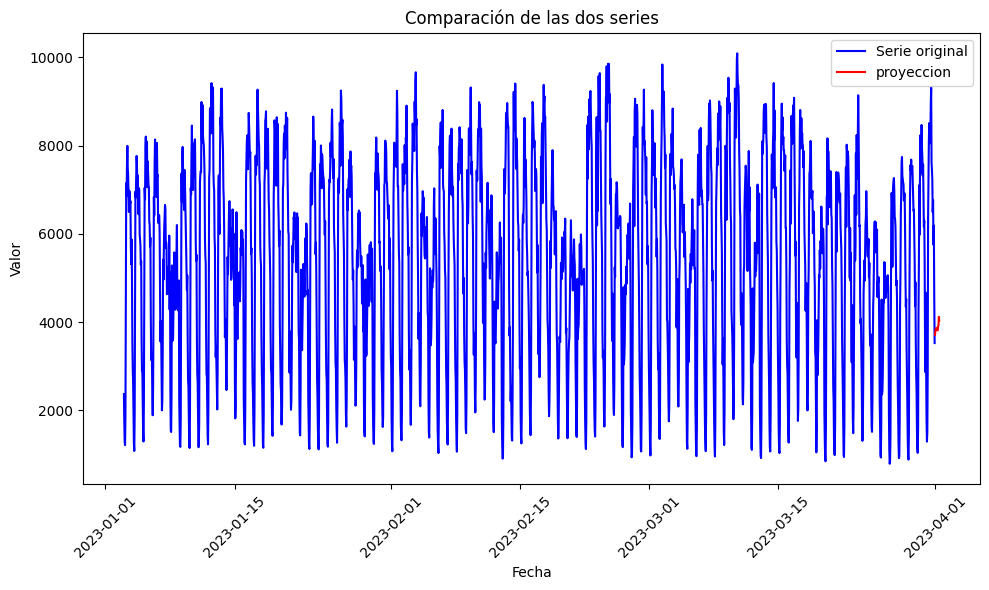

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.plot(df_combined['solo_fecha'], df_combined['total_pasos_alb'], label='Serie original', color='blue')
plt.plot(forecast_df['solo_fecha'], forecast_df['TimeGPT'], label='proyeccion', color='red')

plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Comparación de las dos series')
plt.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
df_combined.tail(12)

,solo_fecha,total_pasos_ill,total_pasos_ave,total_pasos_alb
2100,2023-03-31 12:00:00,1813.242,2355.899,8207.141
2101,2023-03-31 13:00:00,1917.248,2558.103,8919.351
2102,2023-03-31 14:00:00,1939.397,2609.009,9320.406
2103,2023-03-31 15:00:00,1860.216,2334.005,7622.266
2104,2023-03-31 16:00:00,2095.274,2173.157,7451.588
2105,2023-03-31 17:00:00,2147.351,2164.252,7230.083
2106,2023-03-31 18:00:00,1902.154,1978.972,6494.268
2107,2023-03-31 19:00:00,2561.000,1955.075,6762.081
2108,2023-03-31 20:00:00,1650.063,1959.960,5759.058
2109,2023-03-31 21:00:00,2115.000,1500.424,6188.424


2. Variables exógenas futuras


In [ ]:
ruta_csv = '/content/drive/My Drive/Colab Notebooks/analisis_de_series_temporales/Clase8/DISTANCIA 2024/Var_Ex_Fut_Prueba.csv'
Var_Ex_Fut_Prueba = pd.read_csv(ruta_csv, encoding='latin1')

Var_Ex_Fut_Prueba.head(12)

,MesMesAño,Hora HH,total_pasos_ave,total_pasos_ill
0,1/4/2023,12:00:00 AM,4629.646652,344.240379
1,1/4/2023,1:00:00 AM,5589.791760,379.669153
2,1/4/2023,2:00:00 AM,5261.008088,377.829441
3,1/4/2023,3:00:00 AM,5070.107642,362.069392
4,1/4/2023,4:00:00 AM,4738.966444,384.126381
5,1/4/2023,5:00:00 AM,4255.541490,361.751130
6,1/4/2023,6:00:00 AM,3987.971656,329.731853
7,1/4/2023,7:00:00 AM,3616.693356,406.332720
8,1/4/2023,8:00:00 AM,3704.431580,300.018969
9,1/4/2023,9:00:00 AM,2896.010180,314.040424


In [ ]:
# formato Datetime
Var_Ex_Fut_Prueba['fecha'] = pd.to_datetime(Var_Ex_Fut_Prueba['MesMesAño'], format='%d/%m/%Y')
Var_Ex_Fut_Prueba['hora'] = pd.to_datetime(Var_Ex_Fut_Prueba['Hora HH'], format='%I:%M:%S %p').dt.time
#mezcla
Var_Ex_Fut_Prueba['solo_fecha'] = Var_Ex_Fut_Prueba.apply(lambda row: datetime.combine(row['fecha'], row['hora']), axis=1)



Var_Ex_Fut_Prueba.dtypes

,0
MesMesAño,object
Hora HH,object
total_pasos_ave,float64
total_pasos_ill,float64
fecha,datetime64[ns]
hora,object
solo_fecha,datetime64[ns]


In [ ]:
Var_Ex_Fut_Prueba = Var_Ex_Fut_Prueba.drop(columns=['MesMesAño', 'Hora HH','fecha','hora'])

In [ ]:
Var_Ex_Fut_Prueba

,total_pasos_ave,total_pasos_ill,solo_fecha
0,4629.646652,344.240379,2023-04-01 00:00:00
1,5589.791760,379.669153,2023-04-01 01:00:00
2,5261.008088,377.829441,2023-04-01 02:00:00
3,5070.107642,362.069392,2023-04-01 03:00:00
4,4738.966444,384.126381,2023-04-01 04:00:00
5,4255.541490,361.751130,2023-04-01 05:00:00
6,3987.971656,329.731853,2023-04-01 06:00:00
7,3616.693356,406.332720,2023-04-01 07:00:00
8,3704.431580,300.018969,2023-04-01 08:00:00
9,2896.010180,314.040424,2023-04-01 09:00:00


In [ ]:
# Forecast
forecast_df = nixtla_client.forecast(
    df=df_combined,
    X_df=Var_Ex_Fut_Prueba,
    h=12,
    id_col='unique_id',
    target_col='total_pasos_alb',
    time_col='solo_fecha'
)

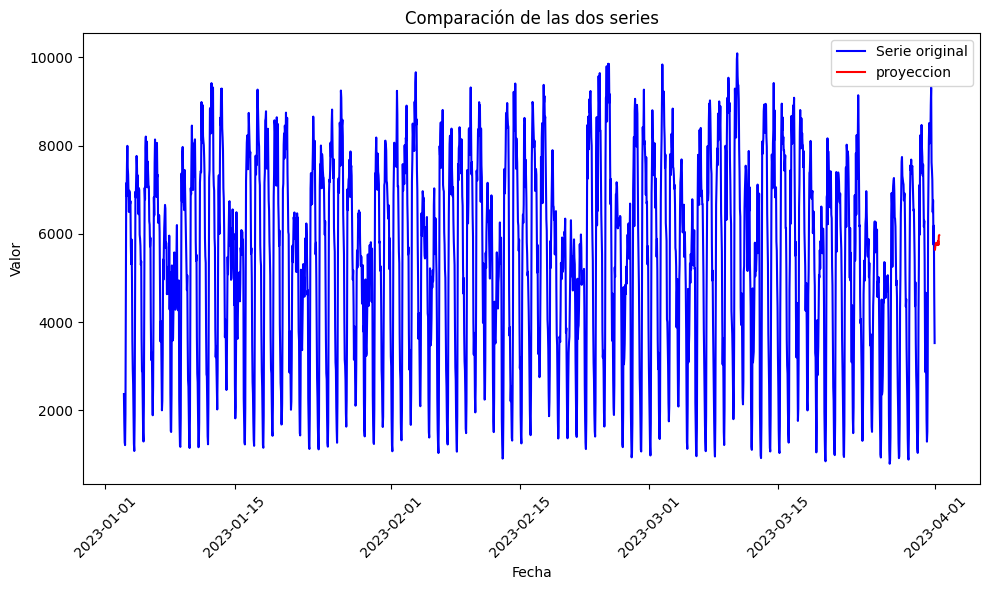

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.plot(df_combined['solo_fecha'], df_combined['total_pasos_alb'], label='Serie original', color='blue')
plt.plot(forecast_df['solo_fecha'], forecast_df['TimeGPT'], label='proyeccion', color='red')


plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Comparación de las dos series')
plt.legend()


plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Añadir festivos y fechas especiales


In [ ]:
import pandas as pd
from nixtla import NixtlaClient
from nixtla.date_features import CountryHolidays
from nixtla.date_features import SpecialDates

In [ ]:
# Obtenga vacaciones en el país de Argentina
c_holidays = CountryHolidays(countries=['AR'])
periods = 365 * 1
dates = pd.date_range(end='2023-12-31', periods=periods)   # 2023-09-01
holidays_df = c_holidays(dates)

# Especifica tus propias fechas especiales
special_dates = SpecialDates(
    special_dates={
        'Important Dates': ['2023-02-26', '2023-04-26'],
        'Very Important Dates': ['2023-04-30', '2023-05-08', '2023-07-26']
    }
)
periods = 365 * 1
dates = pd.date_range(end='2023-12-31', periods=periods)
special_dates_df = special_dates(dates)

In [ ]:
holidays_df.loc['2023-07-09']

,2023-07-09
AR_New Year's Day,0
AR_Carnival Day,0
AR_Memory's National Day for the Truth and Justice,0
AR_Veterans Day and the Fallen in the Malvinas War,0
AR_Good Friday,0
AR_Labor Day,0
AR_May Revolution Day,0
AR_Pass to the Immortality of General Don Manuel Belgrano,0
AR_Independence Day,1
AR_Immaculate Conception,0


In [ ]:
special_dates_df.loc['2023-04-30']

,2023-04-30
Important Dates,0
Very Important Dates,1


# Agregar variables categóricas

In [ ]:
#| hide
!pip install -Uqq nixtla

In [ ]:
#| hide
from nixtla.utils import in_colab

In [ ]:
#| hide
IN_COLAB = in_colab()

In [ ]:
#| hide
if not IN_COLAB:
    from nixtla.utils import colab_badge
    from dotenv import load_dotenv

In [ ]:
#| echo: false
if not IN_COLAB:
    load_dotenv()
    colab_badge('docs/capabilities/forecast/04_categorical_variables')

In [ ]:
import pandas as pd
import datetime
from nixtla import NixtlaClient
from nixtla.date_features import SpecialDates

In [ ]:
nixtla_client = NixtlaClient(
    # defaults to os.environ.get("NIXTLA_API_KEY")
    api_key = 'nixak-h8iV80neQevJ6Zea6Vvw5QtyhIK6ADThKjuvDgp8jVZJiqlnO8C9PyKydKrMxRokzGynSddzUG30T4rc'
)

In [ ]:
#| hide
if not IN_COLAB:
    nixtla_client = NixtlaClient()

In [ ]:
url='https://raw.githubusercontent.com/sebcalcagno/AnalisisSeriesTemporales/main/serie-tiempo-parques-nacionales-mensual.csv'
data = pd.read_csv(url)

In [ ]:
data.fecha = pd.to_datetime(data.indice_tiempo, dayfirst = True)
data = data.iloc[:-22]

<ipython-input-74-595e646f028a>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.fecha = pd.to_datetime(data.indice_tiempo, dayfirst = True)


In [ ]:
data = data[['indice_tiempo', 'total']]

In [ ]:
data

,indice_tiempo,total
0,2008-01-01,550710
1,2008-02-01,434953
2,2008-03-01,321667
3,2008-04-01,130097
4,2008-05-01,92538
...,...,...
141,2019-10-01,358995
142,2019-11-01,404521
143,2019-12-01,436156
144,2020-01-01,779018


In [ ]:


# Create categorical variables to label Christmas and summer vacations
categories_dates = SpecialDates(
    special_dates={
        'vacaciones_navidad': [datetime.date(year, 12, 1) for year in range(2008, 2020 + 1)],
        'vacaciones_verano': [datetime.date(year, month, 1) for year in range(2008, 2020 + 1) for month in (1, 2)]
    }
)

dates = pd.date_range('2008-01-01', '2020-02-01', freq='MS')

categories_df = categories_dates(dates).reset_index(drop=True)

# Merge with the dataset
cat_df = pd.concat([data, categories_df], axis=1)

# Forecast
forecast_df = nixtla_client.forecast(
    df=cat_df,
    h=12,
    target_col='total',
    time_col='indice_tiempo'
)

/usr/local/lib/python3.10/dist-packages/nixtla/nixtla_client.py:360: UserWarning: `df` contains the following exogenous features: ['vacaciones_navidad', 'vacaciones_verano'], but `X_df` was not provided and they were not declared in `hist_exog_list`. They will be ignored.
  warnings.warn(


In [ ]:
cat_df

,indice_tiempo,total,vacaciones_navidad,vacaciones_verano
0,2008-01-01,550710,0,1
1,2008-02-01,434953,0,1
2,2008-03-01,321667,0,0
3,2008-04-01,130097,0,0
4,2008-05-01,92538,0,0
...,...,...,...,...
141,2019-10-01,358995,0,0
142,2019-11-01,404521,0,0
143,2019-12-01,436156,1,0
144,2020-01-01,779018,0,1


In [ ]:
forecast_df

,indice_tiempo,TimeGPT
0,2020-03-01,502544.12
1,2020-04-01,402758.56
2,2020-05-01,261208.90
3,2020-06-01,264476.30
4,2020-07-01,418981.47
5,2020-08-01,341739.97
6,2020-09-01,374752.94
7,2020-10-01,431006.84
8,2020-11-01,462218.25
9,2020-12-01,492965.90


# Horizonte de prediccion largo


In [ ]:
# Forecast
forecast_df = nixtla_client.forecast(
    df=data,
    h=36,
    model='timegpt-1-long-horizon',
    time_col='indice_tiempo',
    target_col="total"
)

In [ ]:
forecast_df.tail(5)

,indice_tiempo,TimeGPT
31,2022-10-01,525263.40
32,2022-11-01,556325.90
33,2022-12-01,608412.25
34,2023-01-01,825923.00
35,2023-02-01,727126.25


# Prediccion de serie multiples

In [ ]:
# Read the data
df = pd.read_csv('https://raw.githubusercontent.com/Nixtla/transfer-learning-time-series/main/datasets/electricity-short.csv')

# Forecast
forecast_df = nixtla_client.forecast(
    df=df,
    h=24
)

In [ ]:
df

,unique_id,ds,y
0,BE,2016-10-22 00:00:00,70.000000
1,BE,2016-10-22 01:00:00,37.100000
2,BE,2016-10-22 02:00:00,37.100000
3,BE,2016-10-22 03:00:00,44.750000
4,BE,2016-10-22 04:00:00,37.100000
...,...,...,...
8395,PJM,2018-12-23 19:00:00,32.461970
8396,PJM,2018-12-23 20:00:00,32.052179
8397,PJM,2018-12-23 21:00:00,27.632347
8398,PJM,2018-12-23 22:00:00,24.746053



# Ajuste con una función de pérdida personalizada

In [ ]:
forecast_df = nixtla_client.forecast(
    df=data,
    h=12,
    finetune_steps=5,
    finetune_loss="mae",
    time_col='indice_tiempo',
    target_col="total"
)

In [ ]:
data

,indice_tiempo,total
0,2008-01-01,550710
1,2008-02-01,434953
2,2008-03-01,321667
3,2008-04-01,130097
4,2008-05-01,92538
...,...,...
141,2019-10-01,358995
142,2019-11-01,404521
143,2019-12-01,436156
144,2020-01-01,779018


# Cross validation

In [ ]:
# Validación cruzada usando dos ventanas

forecast_cv_df = nixtla_client.cross_validation(
    df=data,
    h=12,
    n_windows=2,
    time_col='indice_tiempo',
    target_col="total",
)

# Prediccion con intervalos de confianza

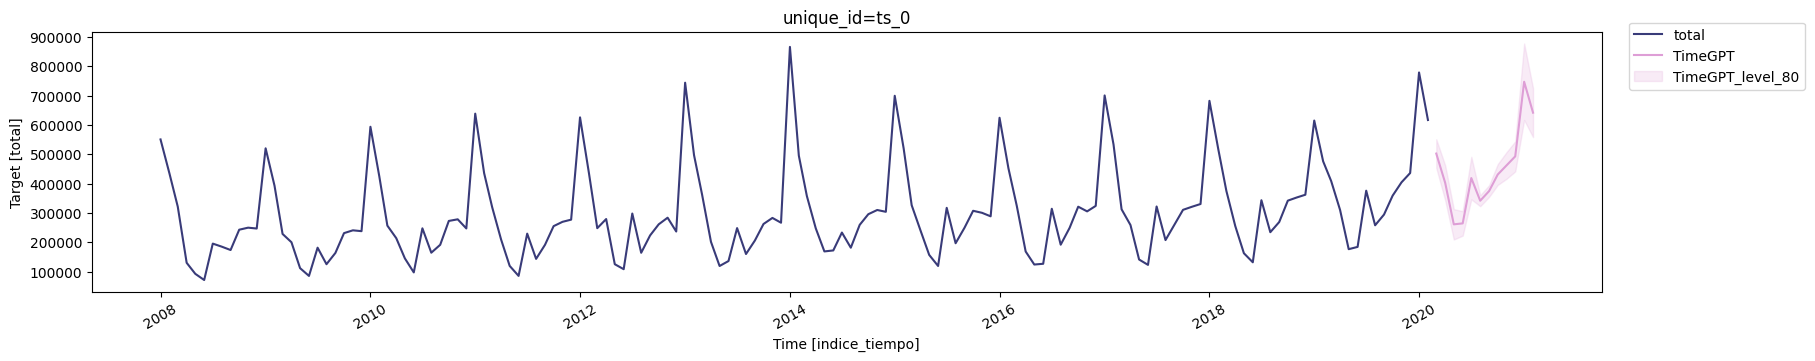

In [ ]:
# Pronosticos usando un 80 % de intervalos de confianza
forecast_df = nixtla_client.forecast(
    df=data,
    h=12,
    time_col='indice_tiempo',
    target_col="total",
    level=[80]
)


nixtla_client.plot(
    df=data,
    forecasts_df=forecast_df,
    time_col='indice_tiempo',
    target_col='total',
    level=[80]
)

Fin del codigo